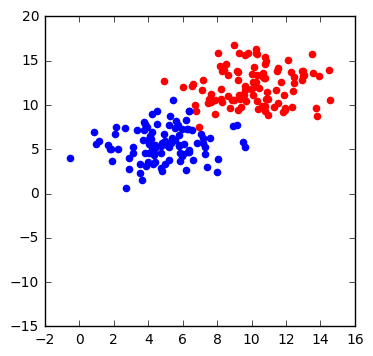

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw(x1, x2):
    ln = plt.plot(x1, x2)
    plt.pause(0.0001)
    ln[0].remove()
    
def sigmoid(score):
    return 1/(1+np.exp(-score))

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(1000):
        p = sigmoid(points*line_parameters)
        gradient = points.T * (p - y) * (alpha/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max() ])
        x2 = - b / w2 + x1 * (- w1 / w2)
        draw(x1 , x2)

n_pts = 100      # number of points for the dataset
np.random.seed(0)  # Ensures random points are generated ever code launch

# Setup the bias for our linear regression model
bias = np.ones(n_pts)
# Creating Random values for testing linear regresion
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12,2,n_pts), bias]).T
bot_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6,2,n_pts), bias]).T
all_points = np.vstack((top_region, bot_region))


line_parameters = np.matrix([np.zeros(3)]).T

# Getting x1 and x2 based on the equation [w1x1 + w2x2 + b = 0]
# x1 = np.array([bot_region[:, 0].min(), top_region[:, 0].max() ])
# x2 = -b / w2 + x1 * (- w1 / w2)
linear_combination = all_points*line_parameters
probabilities = sigmoid(linear_combination)

# Distinguish between top and Bottom Regions( 0 , 1)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)


# plotting the dataset values into a plot
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color = 'r')
ax.scatter(bot_region[:, 0], bot_region[:, 1], color='b')
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()

In [68]:
print(calculate_error(line_parameters, all_points, y))

[[0.69314718]]
